In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [35]:
dfx=pd.read_csv('./weightedX.csv');
dfy=pd.read_csv('./weightedY.csv');


In [36]:
X=dfx.values
y=dfy.values


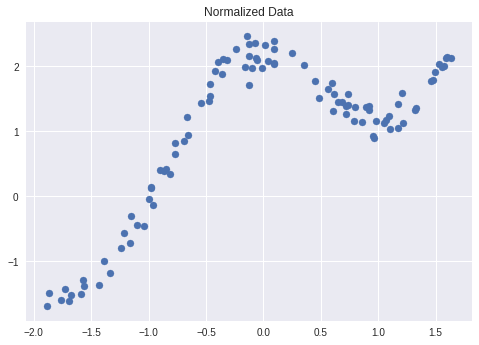

In [37]:
#normalise data
plt.style.use('seaborn');
plt.title("Normalized Data")
u=X.mean();
std=X.std();
X=(X-u)/std;
plt.scatter(X,y);
plt.show();

# 2. Find out W(mxm) diagonal matrix

In [38]:
 def getW(query_point,X,tau):
    M=X.shape[0]
    w=np.mat(np.eye(M))
    
    for i in range(M):
        xi=X[i]
        x=query_point
        w[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau));
    return w;

In [39]:
X=np.mat(X)
y=np.mat(y)
M=X.shape[0]

W=getW(-1,X,1);
print(W.shape);
print(W)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


# 3. Make Predictions

In [44]:
def predict (X,Y,query_x,tau):
    ones=np.ones((M,1))
    X_=np.hstack((X,ones));
    qx=np.mat([query_x,1])
    W=getW(qx,X_,tau)
#     theta='(X'WX)inv*X*WY'
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred=np.dot(qx,theta);
    return theta,pred


In [47]:
theta,pred=predict(X,y,0.0,1.0)
print(pred)

[[1.30485418]]


# 4.Visualise Prediction ,Analyse the 

In [62]:
def plotPrediction(tau):
    X_test=np.linspace(-2,2,20);
    Y_test=[]
    
    for xq in X_test:
        theta,pred=predict(X,y,xq,tau)
        Y_test.append(pred[0][0])
    Y_test=np.array(Y_test)
    Xo=np.array(X)
    yo=np.array(y)
    
    plt.title("tau/Bandwidth");
    plt.scatter(Xo,yo)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()
    

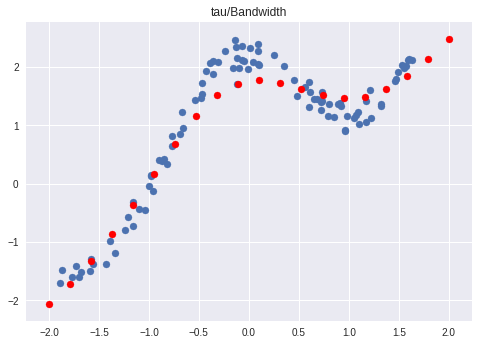

In [63]:
plotPrediction(0.5);

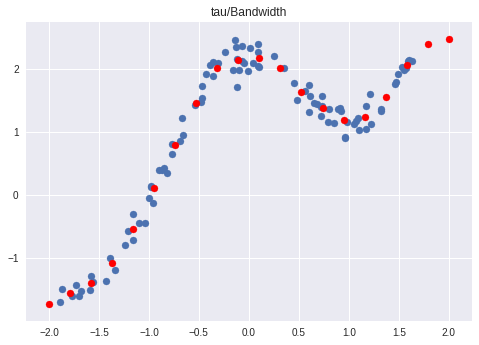

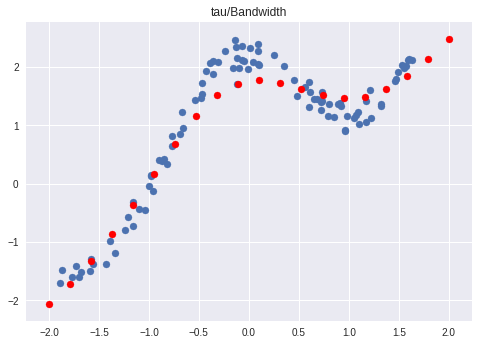

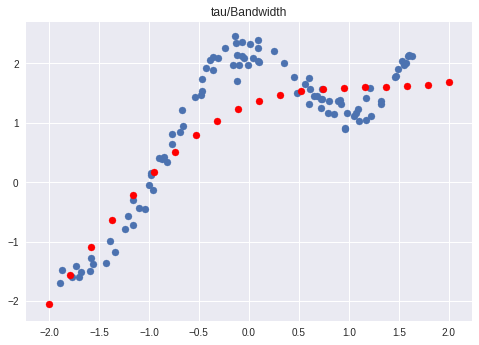

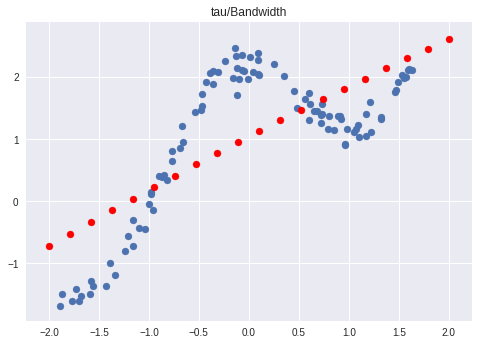

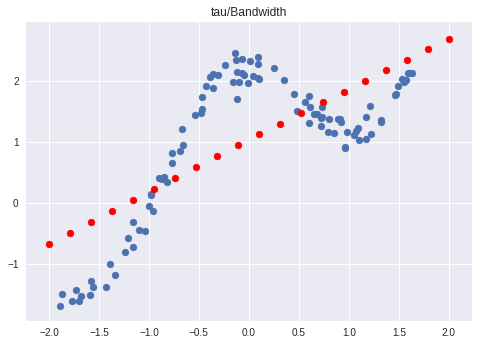

In [64]:
taus=[0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t);